# 01 - Data Preprocessing & Exploratory Data Analysis
## Heart Disease UCI Dataset

### Objectives:
- Load and explore the combined dataset
- Handle missing values
- Perform data encoding and scaling
- Conduct exploratory data analysis (EDA)
- Prepare data for machine learning models

## 1. Import Required Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [23]:
# Load the combined dataset
try:
    # First, try to load from the pre-consolidated CSV
    df = pd.read_csv('../data/heart_disease.csv')
    print("Loaded pre-consolidated dataset")
except FileNotFoundError:
    print("heart_disease.csv not found. Running consolidation script...")
    
    # If CSV doesn't exist, run the consolidation script
    import sys
    sys.path.append('../data')
    from combine_datasets import load_and_combine_datasets
    
    df = load_and_combine_datasets()
    
    if df.empty:
        print("Failed to load dataset. Please check file paths.")
    else:
        print("Dataset consolidated successfully!")

# Display basic information
print(f"\n Dataset Shape: {df.shape}")
print(f"Dataset Columns: {df.columns.tolist()}")

# Display first few rows
df.head()

Loaded pre-consolidated dataset

 Dataset Shape: (920, 15)
Dataset Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'source']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


## 3. Data Quality Assessment

In [24]:
print("=== DATA QUALITY REPORT ===\n")

#Basic information
print("1. Dataset Info:")
df.info()

print("\n2. Data Types:")
print(df.dtypes)

print("\n3. Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if missing_df.empty:
    print("No missing values found!")
else:
    print(missing_df)

print("\n4. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

print("\n5. Basic Statistics:")
df.describe()

=== DATA QUALITY REPORT ===

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB

2. Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 4. Handle Missing Values

In [25]:
print("=== MISSING VALUE HANDLING ===\n")

# Create a copy for preprocessing
df_clean = df.copy()

# Strategy for each column with missing values
missing_columns = df_clean.columns[df_clean.isnull().any()].tolist()

if missing_columns:
    print("Columns with missing values:", missing_columns)
    
    for col in missing_columns:
        missing_count = df_clean[col].isnull().sum()
        print(f"\nHandling missing values in '{col}' ({missing_count} missing):")
        
        # Different strategies based on column type
        if col in ['ca', 'thal']:  # Categorical variables
            # Use mode (most frequent value) for categorical
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"Filled with mode: {mode_val}")
            
        else:  # Numerical variables
            # Use median for numerical (robust to outliers)
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"Filled with median: {median_val:.2f}")
else:
    print("No missing values to handle!")

# Verify no missing values remain
print(f"\n Missing values after handling: {df_clean.isnull().sum().sum()}")

=== MISSING VALUE HANDLING ===

Columns with missing values: ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Handling missing values in 'trestbps' (59 missing):
Filled with median: 130.00

Handling missing values in 'chol' (30 missing):
Filled with median: 223.00

Handling missing values in 'fbs' (90 missing):
Filled with median: 0.00

Handling missing values in 'restecg' (2 missing):
Filled with median: 0.00

Handling missing values in 'thalach' (55 missing):
Filled with median: 140.00

Handling missing values in 'exang' (55 missing):
Filled with median: 0.00

Handling missing values in 'oldpeak' (62 missing):
Filled with median: 0.50

Handling missing values in 'slope' (309 missing):
Filled with median: 2.00

Handling missing values in 'ca' (611 missing):
Filled with mode: 0.0

Handling missing values in 'thal' (486 missing):
Filled with mode: 3.0

 Missing values after handling: 0


## 5. Exploratory Data Analysis (EDA)

=== EXPLORATORY DATA ANALYSIS ===

1. Target Variable Distribution:


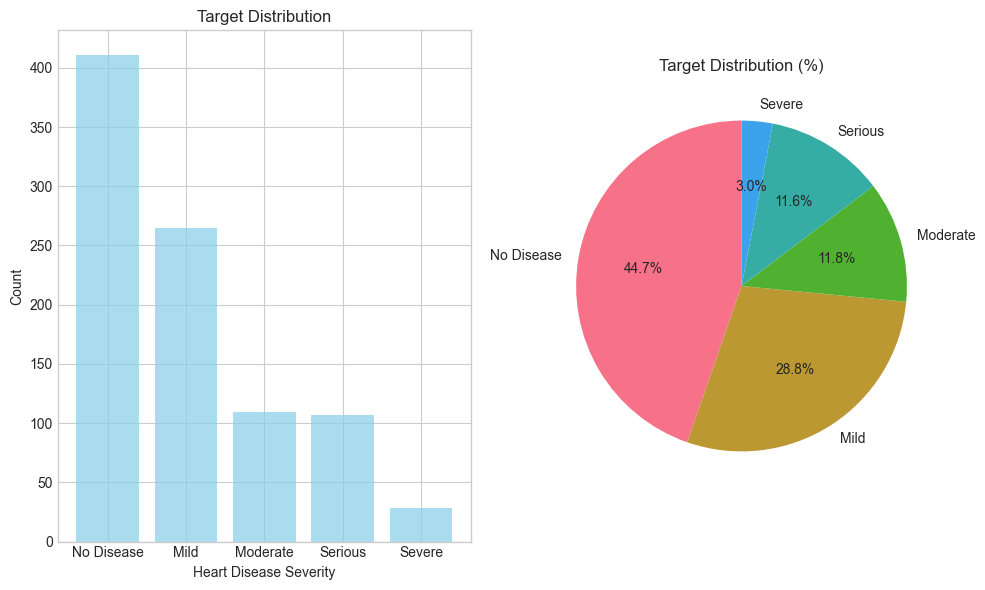

Target value counts:
  Severity 0: 411 cases (44.7%)
  Severity 1: 265 cases (28.8%)
  Severity 2: 109 cases (11.8%)
  Severity 3: 107 cases (11.6%)
  Severity 4: 28 cases (3.0%)


In [26]:
print("=== EXPLORATORY DATA ANALYSIS ===\n")

# 5.1 Target Variable Distribution
print("1. Target Variable Distribution:")
plt.figure(figsize=(10, 6))

target_counts = df_clean['target'].value_counts().sort_index()
plt.subplot(1, 2, 1)
plt.bar(target_counts.index, target_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.xticks([0, 1, 2, 3, 4], ['No Disease', 'Mild', 'Moderate', 'Serious', 'Severe'])

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['No Disease', 'Mild', 'Moderate', 'Serious', 'Severe'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()

print("Target value counts:")
for i, count in target_counts.items():
    print(f"  Severity {i}: {count} cases ({count/len(df_clean)*100:.1f}%)")

2. Numerical Features Distribution:


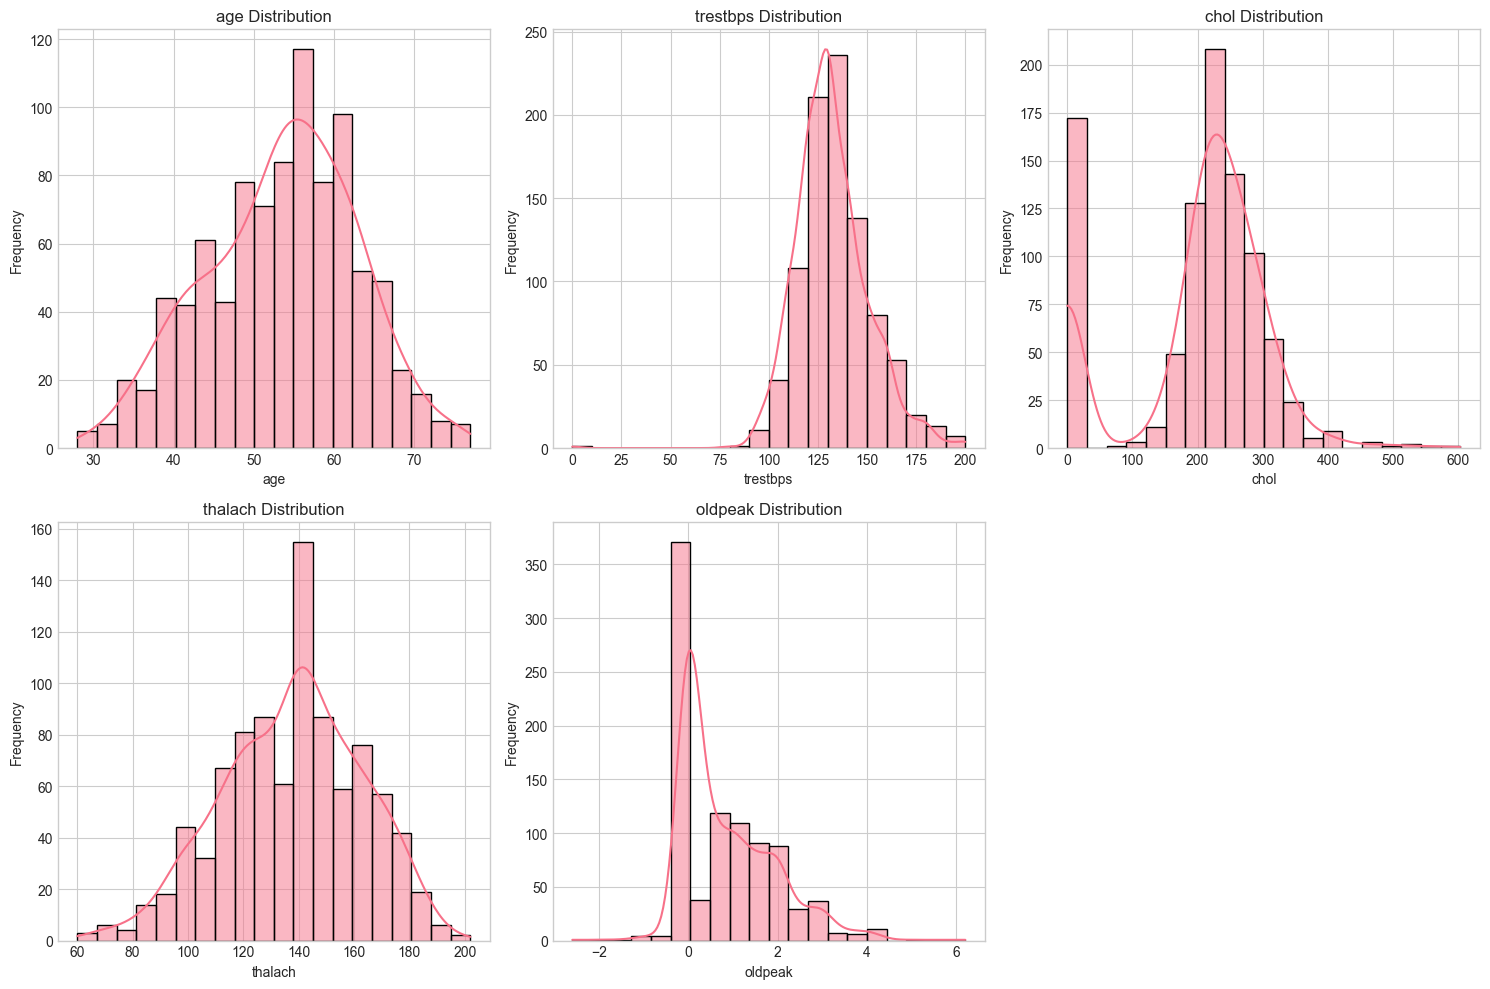

In [27]:
# 5.2 Numerical Features Distribution
print("2. Numerical Features Distribution:")

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_clean[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

3. Categorical Features Analysis:


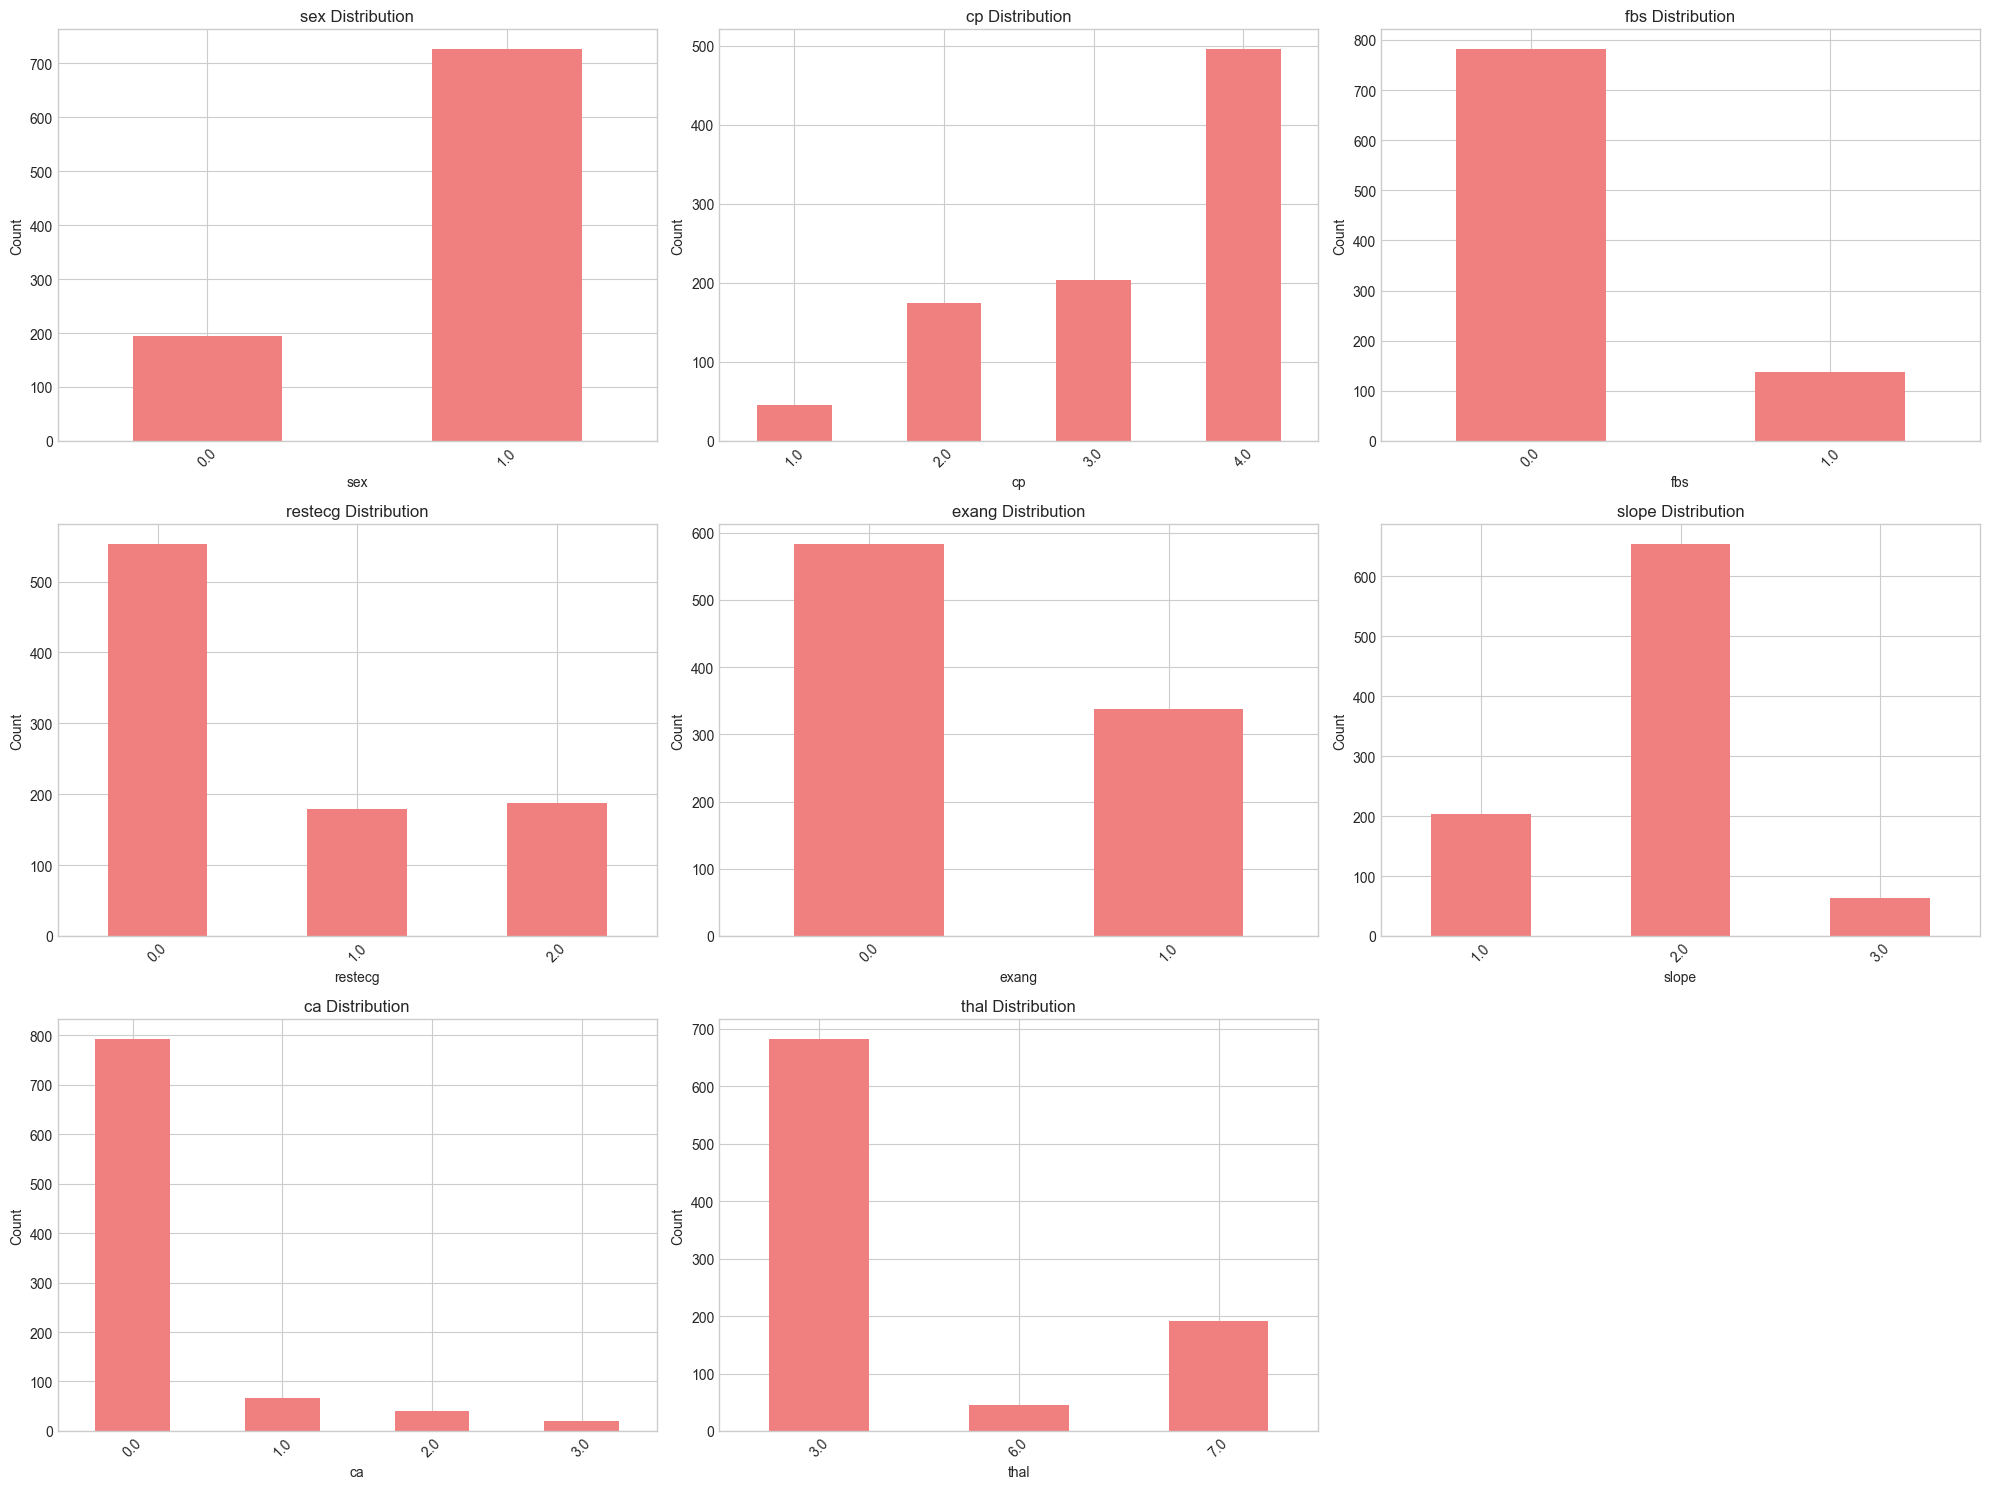

In [28]:
# 5.3 Categorical Features Analysis
print("3. Categorical Features Analysis:")

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df_clean[col].value_counts().sort_index().plot(kind='bar', color='lightcoral')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

4. Correlation Heatmap:


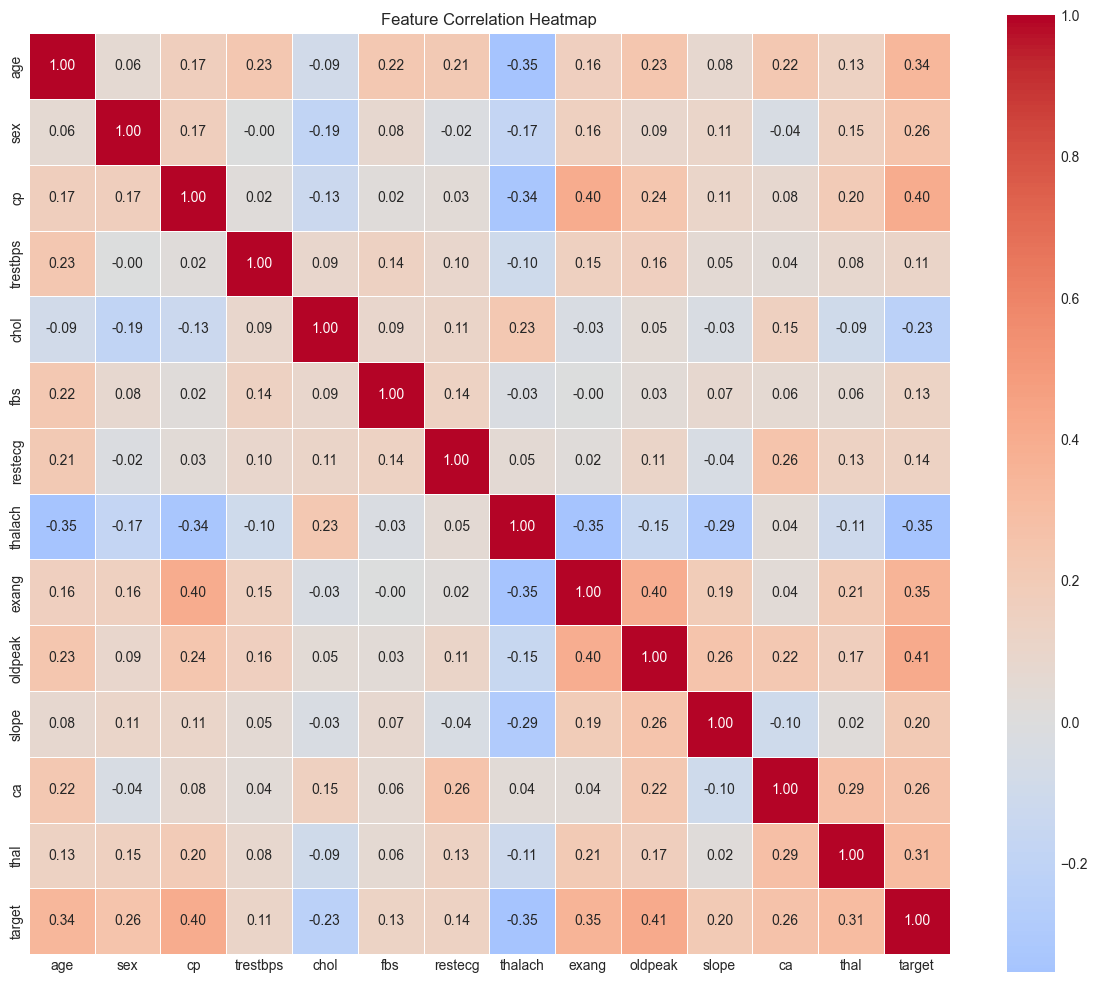


Top correlations with target variable:
  oldpeak: 0.412
  cp: 0.398
  exang: 0.351
  age: 0.340
  thal: 0.311
  ca: 0.262
  sex: 0.259
  slope: 0.202
  restecg: 0.140
  fbs: 0.130
  trestbps: 0.113
  chol: -0.231
  thalach: -0.349


In [29]:
# 5.4 Correlation Heatmap
print("4. Correlation Heatmap:")

# Calculate correlation matrix
corr_matrix = df_clean.drop('source', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Show top correlations with target
target_correlations = corr_matrix['target'].sort_values(ascending=False)
print("\nTop correlations with target variable:")
for feature, corr in target_correlations.items():
    if feature != 'target':
        print(f"  {feature}: {corr:.3f}")

5. Feature-Target Relationships:


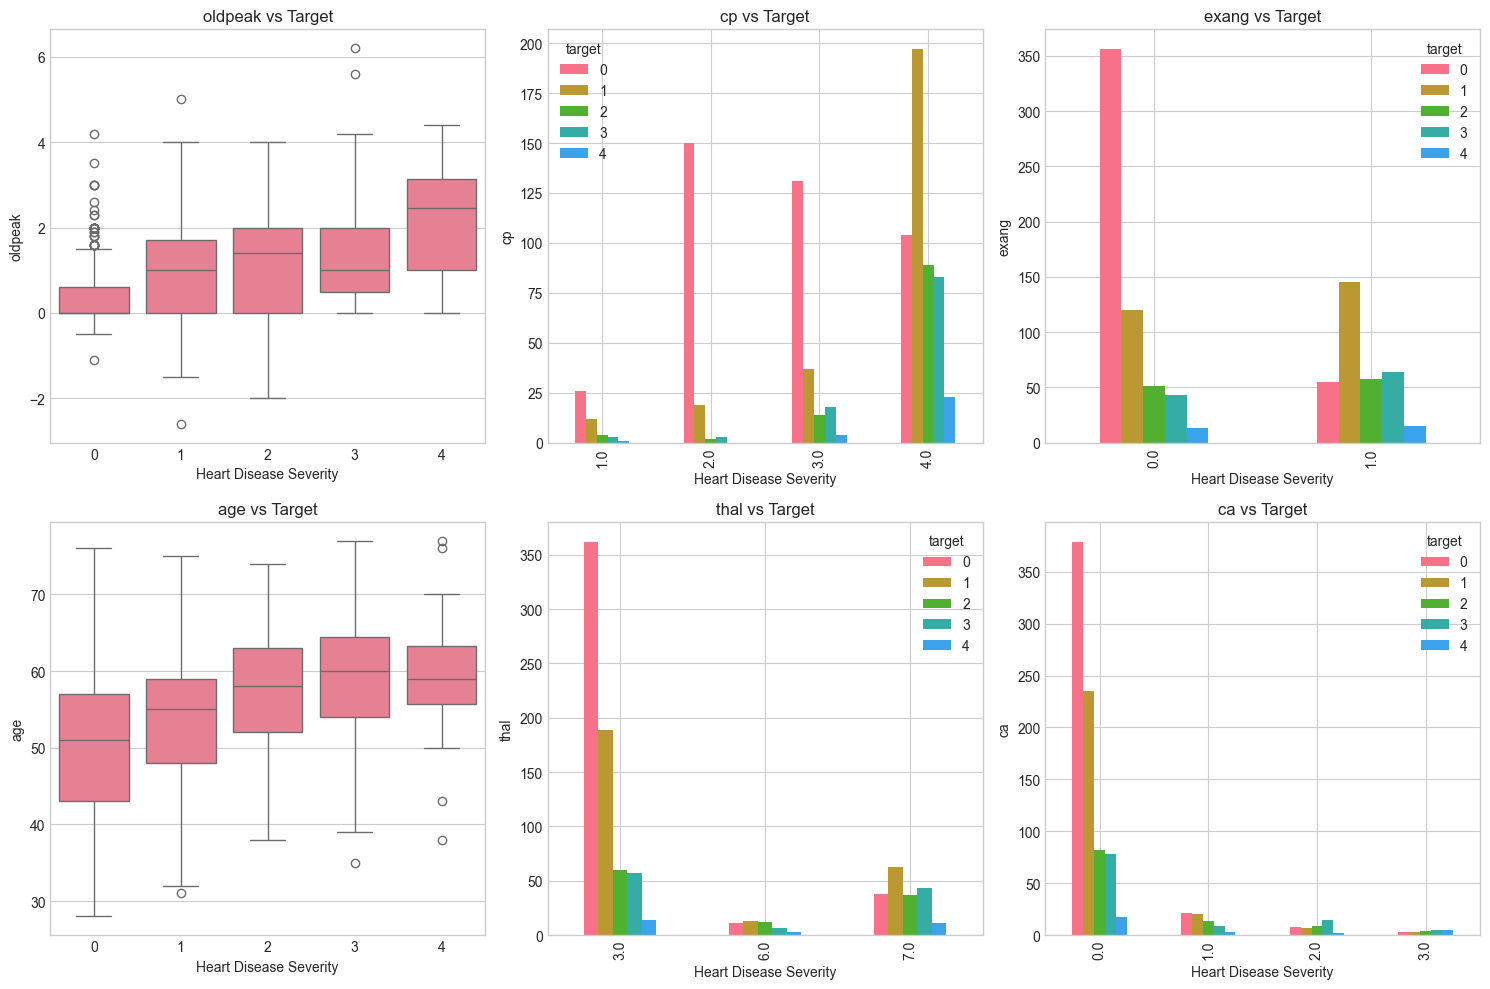

In [30]:
# 5.5 Feature-Target Relationships
print("5. Feature-Target Relationships:")

# Select important features based on correlation
important_features = target_correlations.index[1:7]  # Top 6 features excluding target

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    
    if feature in numerical_cols:
        # Boxplot for numerical features
        sns.boxplot(x='target', y=feature, data=df_clean)
    else:
        # Countplot for categorical features
        pd.crosstab(df_clean[feature], df_clean['target']).plot(kind='bar', ax=plt.gca())
    
    plt.title(f'{feature} vs Target')
    plt.xlabel('Heart Disease Severity')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## 6. Data Preprocessing & Feature Engineering

In [31]:
print("=== DATA PREPROCESSING ===\n")

# Create final preprocessed dataset
df_final = df_clean.copy()

# 6.1 Handle categorical variables (if needed)
# Note: Most features are already numerically encoded
print("1. Categorical Variables Encoding:")
categorical_info = {}
for col in categorical_cols:
    unique_vals = sorted(df_final[col].unique())
    categorical_info[col] = unique_vals
    print(f"  {col}: {unique_vals} unique values")

# 6.2 Feature scaling
print("\n2. Feature Scaling:")

# Separate features and target
X = df_final.drop(['target', 'source'], axis=1)  # Features
y = df_final['target']  # Target variable

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled using StandardScaler")
print(f"   Original shape: {X.shape}")
print(f"   Scaled shape: {X_scaled_df.shape}")

=== DATA PREPROCESSING ===

1. Categorical Variables Encoding:
  sex: [np.float64(0.0), np.float64(1.0)] unique values
  cp: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)] unique values
  fbs: [np.float64(0.0), np.float64(1.0)] unique values
  restecg: [np.float64(0.0), np.float64(1.0), np.float64(2.0)] unique values
  exang: [np.float64(0.0), np.float64(1.0)] unique values
  slope: [np.float64(1.0), np.float64(2.0), np.float64(3.0)] unique values
  ca: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)] unique values
  thal: [np.float64(3.0), np.float64(6.0), np.float64(7.0)] unique values

2. Feature Scaling:
Features scaled using StandardScaler
   Original shape: (920, 13)
   Scaled shape: (920, 13)


In [32]:
# 6.3 Train-Test Split
print("\n3. Train-Test Split:")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(" Data split into training and testing sets")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")
print(f"   Features: {X_train.shape[1]}")

# Check class distribution in splits
print("\n   Class distribution in training set:")
print(y_train.value_counts().sort_index())
print("\n   Class distribution in testing set:")
print(y_test.value_counts().sort_index())


3. Train-Test Split:
 Data split into training and testing sets
   Training set: 736 samples
   Testing set: 184 samples
   Features: 13

   Class distribution in training set:
target
0    329
1    212
2     87
3     86
4     22
Name: count, dtype: int64

   Class distribution in testing set:
target
0    82
1    53
2    22
3    21
4     6
Name: count, dtype: int64


## 7. Save Processed Data

In [33]:
print("=== SAVING PROCESSED DATA ===\n")

# Save processed datasets
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
df_final.to_csv('../data/heart_disease_processed.csv', index=False)

# Save the scaler for later use
import joblib
joblib.dump(scaler, '../models/scaler.pkl')

print(" Processed data saved successfully!")
print("   - X_train.csv: Training features")
print("   - X_test.csv: Testing features") 
print("   - y_train.csv: Training target")
print("   - y_test.csv: Testing target")
print("   - heart_disease_processed.csv: Full processed dataset")
print("   - scaler.pkl: Fitted StandardScaler")

print(f"\n Final Dataset Info:")
print(f"   Total samples: {len(df_final)}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")


=== SAVING PROCESSED DATA ===

 Processed data saved successfully!
   - X_train.csv: Training features
   - X_test.csv: Testing features
   - y_train.csv: Training target
   - y_test.csv: Testing target
   - heart_disease_processed.csv: Full processed dataset
   - scaler.pkl: Fitted StandardScaler

 Final Dataset Info:
   Total samples: 920
   Features: 13
   Training samples: 736
   Testing samples: 184
